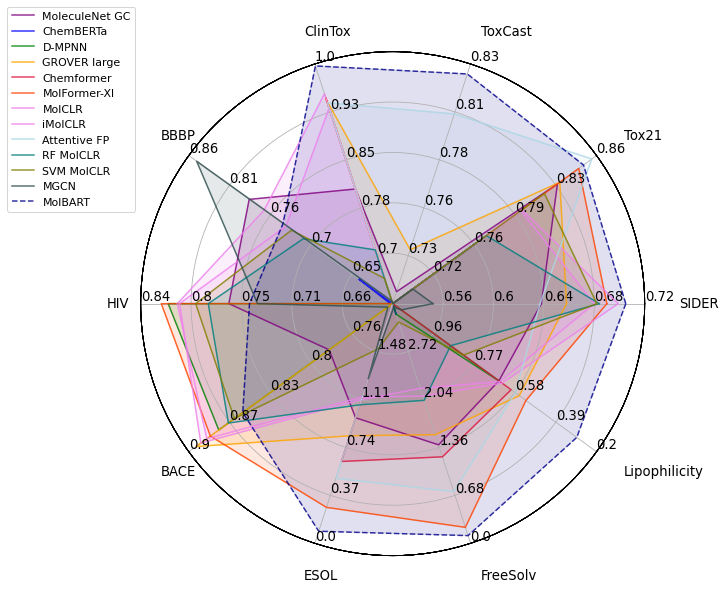

In [7]:
# Based on source from http://stackoverflow.com/questions/38263313/radial-grids-must-be-strictly-positive-error-on-radar-chart
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
AX_MIN_VALUE = 0.1
AX_MAX_VALUE = 0.7  # leave extra room for axis labels that may be long
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])
def _scale_data(data, ranges):
    result = []
    for d, (y1, y2) in zip(data, ranges):
        try:
            assert (y1 <= d <= y2) or (y2 <= d <= y1)
        except AssertionError:
            print(d,y1,y2)
        result.append((d-y1)/(y2-y1)*(AX_MAX_VALUE-AX_MIN_VALUE) + AX_MIN_VALUE) # This is the formula to convert between 2 scales
    return result
class ComplexRadar():
    def __init__(self, 
                 fig, 
                 variables, 
                 ranges,
                 n_ordinate_levels=6, 
                 precision=2, 
                 textsize="larger", 
                 numberssize="larger", 
                 textposrate=1.08, 
                 textposrotation=60):
        angles = np.arange(0, 360, 360./len(variables))
        axes = [fig.add_axes([AX_MIN_VALUE,AX_MIN_VALUE,AX_MAX_VALUE,AX_MAX_VALUE],polar=True,
                label = "axes{}".format(i))
                for i in range(len(variables))]
        #mqm - apparently axes[0] is the circle perimeter, with the var names
        l, text = axes[0].set_thetagrids(angles,
                                         labels=variables,
                                         #frac=textposrate, #no longer exists
                                         horizontalalignment='left',
                                         position=(0.1,1-textposrate),
                                         size=textsize)
        #Rotation is a mistery in newer versions of matplotlib
        # was: [txt.set_rotation(angle - textposrotation) for txt, angle in zip(text, angles)]
        #works but same value for all. Useless
        #axes[0].tick_params(axis='x', labelrotation=60)
        #does not work
        #[txt.set_rotation(angle-textposrotation) for txt, angle in zip(text, angles)]
        #does not work
        #locs, labels = axes[0].get_xticks()
        #[label.set_rotation(180) for label in labels]
        #does not work
        #for label,angle in zip (axes[0].get_xticklabels(), angles): # https://stackoverflow.com/questions/43152502/how-can-i-rotate-xticklabels-in-matplotlib-so-that-the-spacing-between-each-xtic
        #    #label.set_ha("left") # works
        #    label.set_rotation(angle-textposrotation) # does not work
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],
                               num=n_ordinate_levels)
            adjusted_range = [(AX_MIN_VALUE,AX_MAX_VALUE) for i in range(len(ranges))] # radial grids must be strictly positive in matplotlib
            adjusted_grid = np.linspace(*adjusted_range[i],
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,precision))
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(adjusted_grid, labels=gridlabel,
                         angle=angles[i], size=numberssize)
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*adjusted_range[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

data_name = "MoleculeNet"
if data_name == "MoleculeNet":    
    model_names = ["MoleculeNet GC", 'ChemBERTa', 'D_MPNN', "GROVER_large", "Chemformer",  "MolFormer_Xl", "MolCLR", "iMolCLR", "Attentive_FP", "RF MOlCLR", "SVM MolCLR"]
    MoleculeNet =   [0.638, 0.829, 0.716, 0.807, 0.783, 0.763, 0.783, 0.97,  1.4,   0.655]
    ChemBERTa =     [0.52,  0.76,  0.71,  0.63,  0.643, 0.622, 0.73,  1.85,  3.25,  1.15]
    D_MPNN =        [0.52,  0.76,  0.71,  0.63,  0.6,   0.816, 0.875, 1.85,  3.25,  0.65]
    GROVER_large =  [0.658, 0.831, 0.737, 0.944, 0.6,   0.62,  0.894, 0.831, 1.544, 0.56 ]
    MolFormer_Xl =  [0.69,  0.847, 0.71,  0.948, 0.6,   0.822, 0.882, 0.279, 0.231, 0.529]
    MolCLR =        [0.68,  0.798, 0.71,  0.932, 0.736, 0.806, 0.89,  1.11,  2.2,   0.65 ]
    iMolCLR =       [0.699, 0.799, 0.71,  0.954, 0.764, 0.808, 0.885, 1.13,  2.09,  0.64]
    Attentive_FP =  [0.637, 0.858, 0.805, 0.94,  0.6,   0.62,  0.73,  0.503, 0.736, 0.578]
    RF =            [0.684, 0.769, 0.71,  0.713, 0.714, 0.781, 0.867, 1.07,  2.03,  0.88]
    SVM =           [0.682, 0.818, 0.71,  0.669, 0.729, 0.792, 0.862, 1.5,   3.14,  0.82]
    MGCN =          [0.552, 0.707, 0.71,  0.634, 0.85,  0.738, 0.734, 1.27,  3.35,  1.11]
    Chemformer =    [0.52,  0.76,  0.71,  0.63,  0.6,   0.62,  0.73,  0.633, 1.23,  0.598]
    # YerevaNN = [0.593, 0.784, 0.825, 0.999, 0.739, 0.749, 0.854, 0.117, 0.173, 0.3]
    MolBART =  [0.705, 0.851, 0.825, 0.997, 0.74, 0.745, 0.855,  0.095, 0.114, 0.292]
    data = [["SIDER", "Tox21", "ToxCast", "ClinTox", "BBBP", "HIV", "BACE", "ESOL", "FreeSolv", "Lipophilicity"],
            [ MoleculeNet, ChemBERTa, D_MPNN, GROVER_large, Chemformer, MolFormer_Xl, MolCLR, iMolCLR, Attentive_FP, RF, SVM, MGCN, MolBART ]]

    ranges = [(0.52, 0.72), (0.69, 0.862), (0.71, 0.83),
            (0.63, 1), (0.6, 0.86), (0.62, 0.84), (0.73, 0.9), (1.85, 0.002), (3.4, 0.005), (1.15, 0.2)]
    model_names = ["MoleculeNet GC", 'ChemBERTa', 'D-MPNN', "GROVER large", "Chemformer", "MolFormer-Xl", "MolCLR", "iMolCLR", "Attentive FP", "RF MolCLR", "SVM MolCLR", "MGCN", "MolBART"]

    variables = data[0]

    # plotting
    fig1 = plt.figure(figsize=(12, 10))
    radar = ComplexRadar(fig1, variables, ranges)

    col = ["purple", "blue", "green", "orange", "crimson", "orangered", "violet", "violet", "lightblue", "teal", "olive", "darkslategrey", "darkblue"]


    # fig.suptitle(title, x=0.1, y=1.16, fontsize=20, color='#444444')
    # radar.ax.legend(loc='center right', bbox_to_anchor=(0.9, 1.10),
    #       fancybox=False, shadow=False, ncol=48)
    # 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

elif data_name == "Reaction prediction":
    S2S =             [80.3,  70,    82,    89,    65.4,  74]
    WLDN =            [79.6,  74,    84,    89,    62,    74]
    ELECTRO =         [76,    70,    87,    89,    62,    74]
    GTPN =            [82.4,  70,    87.4,  89,    62,    74]
    WLDN5 =           [85.6,  70,    88.3,  89,    62,    74]
    Mol_Transformer = [90.4,  88.6,  92,    90.3,  78.1,  76.2]
    MolBART_beam_10 = [91.8,  89.1,  92.1,  92.8,  82.5,  82.1]
    MolBART_samp_rr = [91.1,  89.1,  91.8,  90.2,  80.4,  81.5]
    data = [["MIT(S)", "MIT(M)", "LEF(S)", "LEF(M)", "STEREO(S)", "STEREO(M)"],
            [ S2S, WLDN, ELECTRO, GTPN, WLDN5, Mol_Transformer, MolBART_beam_10, MolBART_samp_rr]]

    ranges = [(76, 93), (70, 91), (82, 94),
              (89, 93), (62, 84), (74, 85)]
    model_names = ["S2S", 'WLDN', 'ELECTRO', "GTPN", "WLDN5",  "Mol_Transformer", "MolBART Beam-10", "MolBART Sample + ReRank"]

    variables = data[0]

    # plotting
    fig1 = plt.figure(figsize=(12, 8))
    radar = ComplexRadar(fig1, variables, ranges)

    col = ["purple", "blue", "green", "orange", "crimson", "orangered", "violet", "violet", "lightblue", "teal", "olive", "darkslategrey", "darkblue"]
    for i in range(len(data[1])):
        if model_names[i] == "MolBART Beam-10":
                radar.fill(data[1][i], color=col[-1], alpha=0.12)

                radar.plot(data[1][i], color=col[-1], linestyle="dashed", label=model_names[i], alpha=0.8)
        elif model_names[i] == "MolBART Sample + ReRank":
                radar.fill(data[1][i], color=col[i], alpha=0.12)

                radar.plot(data[1][i], color=col[i], linestyle="dashed", label=model_names[i], alpha=0.8)

for i in range(len(data[1])):
    if model_names[i] in ["MolBART", "MolBART Sample + ReRank", "MolBART Beam-10"]:
            radar.fill(data[1][i], color=col[-1], alpha=0.12)

            radar.plot(data[1][i], color=col[-1], linestyle="dashed", label=model_names[i], alpha=0.8)
    else:
            radar.fill(data[1][i], color=col[i], alpha=0.12)

            radar.plot(data[1][i], color=col[i], label=model_names[i], alpha=0.8)
radar.ax.legend(bbox_to_anchor=(0, 1.1))

plt.show()   
fig1.savefig(f"{data_name}_cycle.pdf")
fig1.savefig(f"{data_name}_cycle.png")

In [8]:
['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
                 '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
                 '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
                 '#17becf', '#9edae5']

['#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#8c564b',
 '#c49c94',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf',
 '#9edae5']

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<ipython-input-2-9558739c1801>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
AX_MIN_VALUE = 0.1
AX_MAX_VALUE = 0.7  # leave extra room for axis labels that may be long
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])
def _scale_data(data, ranges):
    result = []
    for d, (y1, y2) in zip(data, ranges):
        try:
            assert (y1 <= d <= y2) or (y2 <= d <= y1)
        except AssertionError:
            print(d,y1,y2)
        result.append((d-y1)/(y2-y1)*(AX_MAX_VALUE-AX_MIN_VALUE) + AX_MIN_VALUE) # This is the formula to convert between 2 scales
    return result 

In [2]:
import matplotlib
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue',
              **{'sans-serif': 'Helvetica Neue'}) 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 11})

In [3]:
class ComplexRadar():
    def __init__(
        self, fig, variables, ranges,
        n_ordinate_levels=4,
        precision=2,
        textsize="30",
        numberssize="larger",
        textposrate=1.1,
        textposrotation=60
    ):
        angles = np.arange(0, 360, 360./len(variables))
        axes = [
            fig.add_axes(
                [AX_MIN_VALUE,AX_MIN_VALUE,AX_MAX_VALUE,AX_MAX_VALUE],
                polar=True,
                label = "axes{}".format(i)
            )
            for i in range(len(variables))
        ]
        
        
        #mqm - apparently axes[0] is the circle perimeter, with the var names
        
        l, text = axes[0].set_thetagrids(angles,
                                         labels=variables,
                                         #frac=textposrate, #no longer exists
                                         horizontalalignment='center',
                                         position=(0.0,1-textposrate),
                                         size=textsize)
        
        
        #Rotation is a mistery in newer versions of matplotlib
        # was: [txt.set_rotation(angle - textposrotation) for txt, angle in zip(text, angles)]
        #works but same value for all. Useless
        #axes[0].tick_params(axis='x', labelrotation=60)
        #does not work
        #[txt.set_rotation(angle-textposrotation) for txt, angle in zip(text, angles)]
        #does not work
        #locs, labels = axes[0].get_xticks()
        #[label.set_rotation(180) for label in labels]
        #does not work
        #for label,angle in zip (axes[0].get_xticklabels(), angles): # https://stackoverflow.com/questions/43152502/how-can-i-rotate-xticklabels-in-matplotlib-so-that-the-spacing-between-each-xtic
        #    #label.set_ha("left") # works
        #    label.set_rotation(angle-textposrotation) # does not work
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],
                               num=n_ordinate_levels)
            adjusted_range = [(AX_MIN_VALUE,AX_MAX_VALUE) for i in range(len(ranges))] # radial grids must be strictly positive in matplotlib
            adjusted_grid = np.linspace(*adjusted_range[i],
                               num=n_ordinate_levels)
            
            gridlabel = ["{}".format(round(x,precision))
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(adjusted_grid, labels=gridlabel,
                         angle=angles[i], size=numberssize)
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*adjusted_range[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

['S2S', 'WLDN', 'ELECTRO', 'GTPN', 'WLDN5', 'Mol_Transformer', 'MolBART Beam-10', 'MolBART Sample-ReRank']


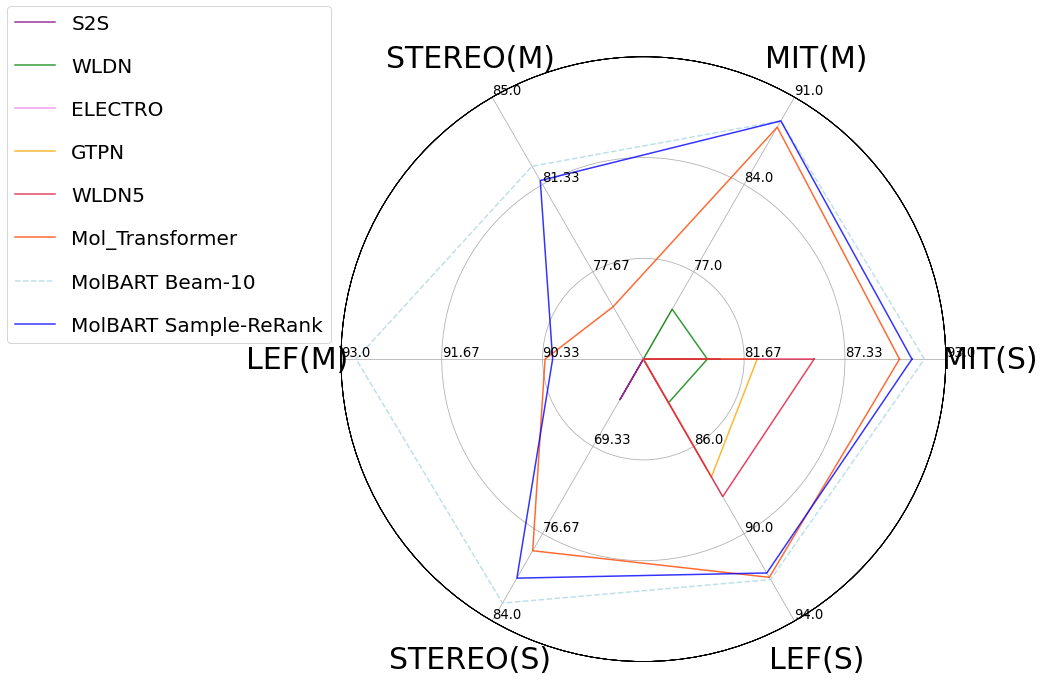

In [27]:
# Based on source from http://stackoverflow.com/questions/38263313/radial-grids-must-be-strictly-positive-error-on-radar-chart

# -------------------------- original -------------------------- 

# data = [["MIT(S)", "MIT(M)", "LEF(S)", "LEF(M)", "STEREO(S)", "STEREO(M)"],
#             [ S2S, WLDN, ELECTRO, GTPN, WLDN5, Mol_Transformer, MolBART_beam_10, MolBART_samp_rr]]

# S2S =             [80.3,  70,    82,    89,    65.4,  74]
# WLDN =            [79.6,  74,    84,    89,    62,    74]
# ELECTRO =         [76,    70,    87,    89,    62,    74]
# GTPN =            [82.4,  70,    87.4,  89,    62,    74]
# WLDN5 =           [85.6,  70,    88.3,  89,    62,    74]
# Mol_Transformer = [90.4,  88.6,  92,    90.3,  78.1,  76.2]
# MolBART_beam_10 = [91.8,  89.1,  92.1,  92.8,  82.5,  82.1]
# MolBART_samp_rr = [91.1,  89.1,  91.8,  90.2,  80.4,  81.5]

# -------------------------------------------------------------
S2S =             [80.3,  70,  74,        89,    65.4, 82]
WLDN =            [79.6,  74,    74,        89,    62, 84,]
ELECTRO =         [76,    70,    74,    89,    62,    87]
GTPN =            [82.4,  70,    74,  89,    62,    87.4]
WLDN5 =           [85.6,  70,    74,  89,    62,    88.3]
Mol_Transformer = [90.4,  88.6,  76.2,    90.3,  78.1,  92]
MolBART_beam_10 = [91.8,  89.1,  82.1,  92.8,  82.5,  92.1]
MolBART_samp_rr = [91.1,  89.1,  81.5,  90.2,  80.4,  91.8]
# YerevaNN = [0.593, 0.784, 0.825, 0.999, 0.739, 0.749, 0.854, 0.117, 0.173, 0.3]
# MolBART =  [0.705, 0.851, 0.825, 0.997, 0.74, 0.745, 0.855,  0.095, 0.114, 0.292]

data = [["MIT(S)", "MIT(M)", "STEREO(M)", "LEF(M)", "STEREO(S)", "LEF(S)"],
            [ S2S, WLDN, ELECTRO, GTPN, WLDN5, Mol_Transformer, MolBART_beam_10, MolBART_samp_rr]]

# ranges = [(76, 93), (70, 91), (82, 94),
#             (89, 93), (62, 84), (74, 85)] --original


ranges = [(76, 93), (70, 91), (74, 85),
            (89, 93), (62, 84), (82, 94)]
model_names = ["S2S", 
        'WLDN', 
        'ELECTRO', 
        "GTPN", 
        "WLDN5",  
        "Mol_Transformer", 
        "MolBART Beam-10", 
        "MolBART Sample-ReRank"]

variables = data[0]



data[0] = [
    i.center(13, '.') for i in data[0]
]

# model_names = [
#     "MoleculeNet GC", 
#     'ChemBERTa', 
#     'D-MPNN', 
#     "GROVER large", 
#     "Chemformer", 
#     "MolFormer-Xl", 
#     "MolCLR", 
#     "iMolCLR", 
#     "Attentive FP", 
#     "RF MolCLR", 
#     "SVM MolCLR", 
#     "MGCN", 
#     "MolBART"
# ]

print(model_names)

# plotting
fig1 = plt.figure(figsize=(24, 12))
radar = ComplexRadar(fig1, variables, ranges)

col = [
    "purple",
    "green", 
    "violet",
    "orange",
    "crimson",
    "orangered",
    "lightblue",
    "blue",  
    "teal", 
    "olive", 
    "darkslategrey",
    "lightblue"
]


for i in range(len(data[1])):
    if model_names[i] in ["MolBART", "MolBART Sample + ReRank", "MolBART Beam-10"]:
            radar.plot(data[1][i], color=col[i], linestyle="dashed", label=model_names[i], alpha=0.8)
    else:
            radar.plot(data[1][i], color=col[i], label=model_names[i], alpha=0.8)

radar.ax.legend(bbox_to_anchor=(0, 1.1), labelspacing=1.2, fontsize=20)

plt.show()  

fig1.savefig(f"_cycle_uspto.pdf")
fig1.savefig(f"_cycle_uspto.png")


